# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno

from ml.utils.utils import get_data, outlier_overview, export_data

In [8]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None) 

# Read the Data

In [11]:
df = get_data("smartphone_cleaned_v2", "processed")
df.sample(50)

,model,price,rating,os,brand_name,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,processor_brand,ram_capacity,internal_memory,battery_capacity,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,fast_charging_available,extended_memory_available,extended_upto
934,Realme C11 2021,6499,61.0,android,realme,False,False,False,8.0,1.60,sc9863a,2.0,32.0,5000.0,NaN,6.52,720 x 1600,60,1,1,8,5.0,0,1,NaN
750,Vivo Y33T,15990,81.0,android,vivo,False,False,False,8.0,2.40,snapdragon,8.0,128.0,5000.0,18.0,6.58,1080 x 2408,90,3,1,50,16.0,1,1,1024.0
775,Huawei P40 Pro,82990,NaN,android,huawei,True,True,False,8.0,2.86,kirin,8.0,256.0,4200.0,40.0,6.58,1200 x 2640,90,4,2,50,32.0,1,1,256.0
679,Nokia G21,11999,71.0,android,nokia,False,False,False,8.0,1.60,unisoc,4.0,64.0,5050.0,18.0,6.50,720 x 1600,90,3,1,50,8.0,1,1,512.0
587,Xiaomi Redmi Note 10 5G,12490,76.0,android,xiaomi,True,False,True,8.0,2.20,dimensity,4.0,128.0,5000.0,18.0,6.50,1080 x 2400,90,3,1,48,8.0,1,1,512.0
135,Xiaomi Redmi Note 11 Pro Plus 5G (8GB RAM + 25...,22999,87.0,android,xiaomi,True,False,True,8.0,2.20,snapdragon,8.0,256.0,5000.0,67.0,6.67,1080 x 2400,120,3,1,108,16.0,1,1,1024.0
110,Tecno Phantom X2,39999,85.0,android,tecno,True,True,False,8.0,3.05,dimensity,8.0,256.0,5160.0,45.0,6.80,1080 x 2400,120,3,1,64,32.0,1,0,NaN
628,Vivo Y10,12490,63.0,android,vivo,False,False,False,8.0,2.30,helio,4.0,128.0,5000.0,NaN,6.51,720 x 1600,60,2,1,13,8.0,0,0,NaN
842,Xiaomi Redmi Note 4,10300,65.0,android,xiaomi,False,False,False,8.0,2.00,snapdragon,4.0,64.0,4100.0,NaN,5.50,1080 x 1920,60,1,1,13,5.0,0,1,128.0
85,Motorola Edge 30 5G,22999,83.0,android,motorola,True,True,False,8.0,2.50,snapdragon,6.0,128.0,4020.0,33.0,6.50,1080 x 2400,144,3,1,50,32.0,1,0,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model                      980 non-null    object 
 1   price                      980 non-null    int64  
 2   rating                     879 non-null    float64
 3   os                         966 non-null    object 
 4   brand_name                 980 non-null    object 
 5   has_5g                     980 non-null    bool   
 6   has_nfc                    980 non-null    bool   
 7   has_ir_blaster             980 non-null    bool   
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  processor_brand            960 non-null    object 
 11  ram_capacity               980 non-null    float64
 12  internal_memory            980 non-null    float64
 13  battery_capacity           969 non-null    float64

In [13]:
df.shape

(980, 25)

In [14]:
# check for duplicate rows in the data

df.duplicated().sum()

np.int64(0)

# Missing Value Analysis

In [15]:
# check for missing values in the data

df.isnull().sum()

model                          0
price                          0
rating                       101
os                            14
brand_name                     0
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
num_cores                      6
processor_speed               42
processor_brand               20
ram_capacity                   0
internal_memory                0
battery_capacity              11
fast_charging                211
screen_size                    0
resolution                     0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              0
primary_camera_rear            0
primary_camera_front           5
fast_charging_available        0
extended_memory_available      0
extended_upto                480
dtype: int64

In [16]:
# columns with missing values

(
    df.isnull()
    .sum()
    .loc[lambda x: x > 0]
    .index
    .to_list()
)

['rating',
 'os',
 'num_cores',
 'processor_speed',
 'processor_brand',
 'battery_capacity',
 'fast_charging',
 'primary_camera_front',
 'extended_upto']

In [17]:
# check % for missing values in columns with missing values 

(
    df.isnull()
    .sum()
    .loc[lambda x: x > 0] 
    .sort_values(ascending = False) / len(df) * 100
)

extended_upto           48.979592
fast_charging           21.530612
rating                  10.306122
processor_speed          4.285714
processor_brand          2.040816
os                       1.428571
battery_capacity         1.122449
num_cores                0.612245
primary_camera_front     0.510204
dtype: float64

In [18]:
# number of rows in the data that have missing values

missing_rows = (
    df
    .isnull()
    .any(axis=1)
    .sum()
)

print(f'There are {missing_rows} rows with missing values in the data.')

print(f"It accounts for {(missing_rows/df.shape[0])*100:.2f}% of the data")

There are 628 rows with missing values in the data.
It accounts for 64.08% of the data


In [19]:
msno.bar(df)

<Axes: >

In [20]:
msno.heatmap(df)

<Axes: >

In [21]:
# primary_camera_front v/s num_front_cameras for rows with values for primary_camera_front

(
    df
    .loc[df["primary_camera_front"].isna(), ["primary_camera_front", "num_front_cameras"]]
)

,primary_camera_front,num_front_cameras
69,NaN,Missing
458,NaN,Missing
599,NaN,1
954,NaN,Missing
972,NaN,Missing


### Observations - Missing Value Analysis 

- The dataset contains **980 rows** and **25 columns**.
- There are **no duplicated rows** in the dataset.
- Missing values are present in the following columns:
  - **`rating`**
  - **`processor_brand`**
  - **`num_cores`**
  - **`processor_speed`**
  - **`battery_capacity`**
  - **`fast_charging`**
  - **`num_front_cameras`**
  - **`os`**
  - **`primary_camera_front`**
  - **`extended_upto`**
- In `extended_upto` column missing values are due to the smartphones not having extended memory feature.
- In `fast_charging` column missing values are due to either there is no fast charging or fast charging wattage is not known.
- In most of the rows `num_front_cameras` is missing due to primary_camera_front missing.

# Outlier Analysis

## Price

In [22]:
outlier_overview(dataframe= df, column_name = "price")

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

In [23]:
sns.kdeplot(data = df, x = "price")

<Axes: xlabel='price', ylabel='Density'>

In [24]:
outliers_df = df.loc[
    df['price'] > (df['price'].quantile(0.75) + 1.5 * (df['price'].quantile(0.75) - df['price'].quantile(0.25)))
]

outliers_df.shape

(107, 25)

In [26]:
# export data in csv for better analysis

export_data(outliers_df, "export", "outliers")

Data successfully exported to: E:\Learnings\Learning_curves\Smartphone_spec_score_analysis\data\export\outlier.csv


### Observations - Outliers Analysis

- `Price` column has potential outliers.
- Phones with prices greater than 200000 can be considered as outliers as they are luxury devices and cannot be represented by the features.

# Actions to be taken

- Fill missing values in the extended_upto column with 0 where extended_memory_available = 0.
- Remove smartphones with price > 200000.

In [23]:
analysis_df = prepare_segment_trends_data(df)

In [28]:
outlier_overview(dataframe= analysis_df, column_name = "price")

count       976.000000
mean      31029.820697
std       29870.079162
min        3499.000000
25%       12999.000000
50%       19990.000000
75%       34999.000000
max      199990.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

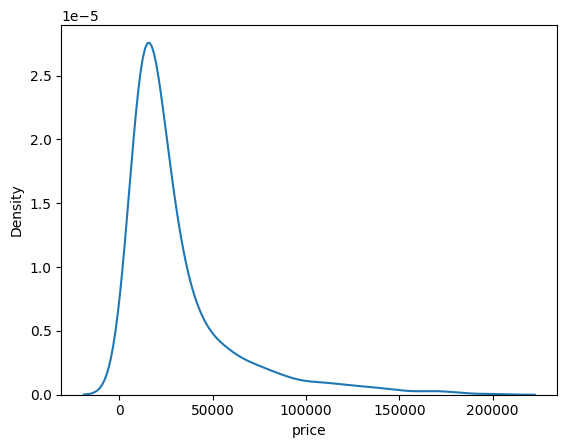

In [27]:
sns.kdeplot(data = analysis_df, x = "price")